## Практична робота 10

### Завдання

Створити, навчити та оцінити нейронну мережу для класифікації зображень з датасету cifar10. Мережа повинна містити чотири шари та бути побудована без використання згорткових шарів. Також потрібно вивести графіки функції втрат і точності під час тренування та розпізнати 10 випадкових зображень з тестового набору.

In [2]:
# Імпорт необхідних бібліотек
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

1. Підготовка Датасету:

Завантажити та розділити датасет  cifar_10  на тренувальний та тестовий набори.

Нормалізувати дані для швидшого та ефективнішого тренування мережі.

170498071/170498071 [==============================] - 11s 0us/step
x_train original shape (50000, 32, 32, 3)
y_train original shape (50000, 1)


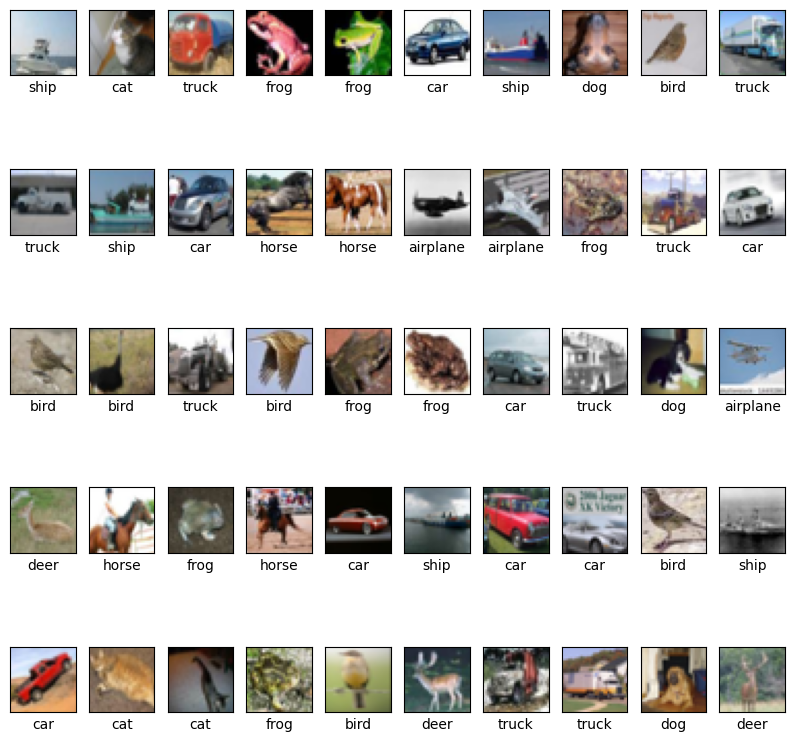

In [3]:
# Завантаження та розділення датасету
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print("x_train original shape", x_train.shape)
print("y_train original shape", y_train.shape)


classes = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i][0]])

In [ ]:
# Нормалізація даних
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Перетворення міток в категоріальні дані
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

2. Будівництво Моделі:

Створити нейронну мережу з використанням Keras з чотирма шарами (повністю з'єднані).

Встановити необхідну кількість вузлів на кожному шарі та використати підходящі функції активації.

Задати функцію втрат та оптимізатор для тренування.

Підберіть оптимальну кількість епох. Пам’ятайте про проблему перенавчвння.

3. Тренування Моделі:

Запустити тренування моделі на тренувальному наборі.

Вивести графіки функції втрат та точності відносно епох тренування.

In [ ]:
# Будівництво моделі
model = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),  # Плоский шар для згладжування зображення
    layers.Dense(128, activation="relu"),   # Повністю з'єднаний шар з 128 вузлами
    layers.Dense(64, activation="relu"),    # Повністю з'єднаний шар з 64 вузлами
    layers.Dense(32, activation="relu"),    # Повністю з'єднаний шар з 32 вузлами
    layers.Dense(10, activation="softmax")  # Вихідний шар з 10 вузлами та функцією активації softmax
])

# Компіляція моделі
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Виведення інформації про модель
model.summary()

# Тренування моделі
history = model.fit(x_train, y_train, epochs=25, batch_size=64, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 404010 (1.54 MB)
Trainable params: 404010 (1.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
625/625 [

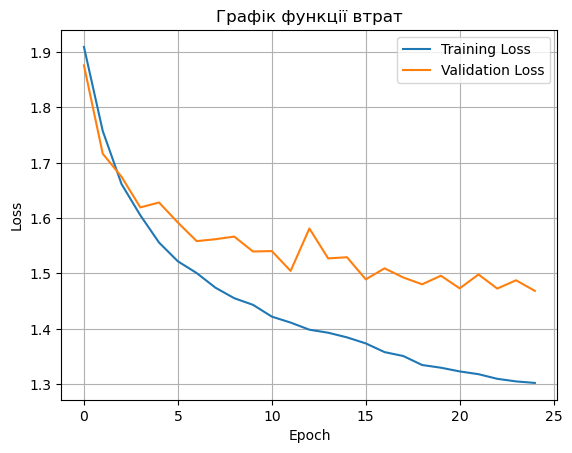

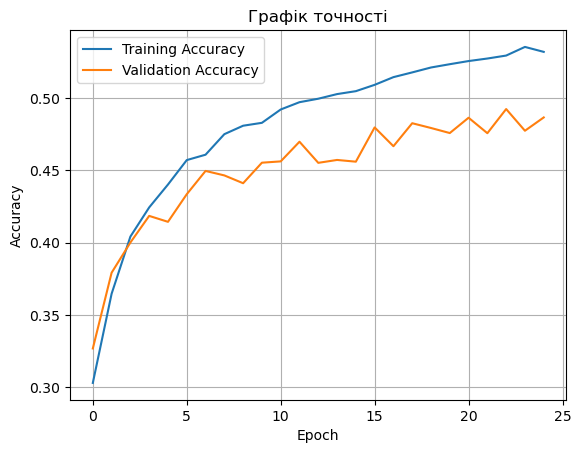

In [ ]:
# Виведення графіків функції втрат та точності
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Графік функції втрат")
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Графік точності")
plt.grid()
plt.legend()
plt.show()

4. Оцінка Точності:

Оцінити точність моделі на тестовому наборі.

5. Розпізнавання Зображень:

Вибрати 10 випадкових зображень з тестового набору та використати навчену модель для їх класифікації.

Вивести спрогнозовані класи та порівняти їх із справжніми класами.

313/313 - 0s - loss: 1.4398 - accuracy: 0.4976 - 370ms/epoch - 1ms/step

Test Accuracy: 49.76%
1/1 [==============================] - 0s 76ms/step
Image 1: Predicted Class 8, True Class 0
Image 2: Predicted Class 5, True Class 5
Image 3: Predicted Class 8, True Class 8
Image 4: Predicted Class 8, True Class 9
Image 5: Predicted Class 3, True Class 5
Image 6: Predicted Class 7, True Class 8
Image 7: Predicted Class 1, True Class 1
Image 8: Predicted Class 8, True Class 8
Image 9: Predicted Class 2, True Class 0
Image 10: Predicted Class 9, True Class 8


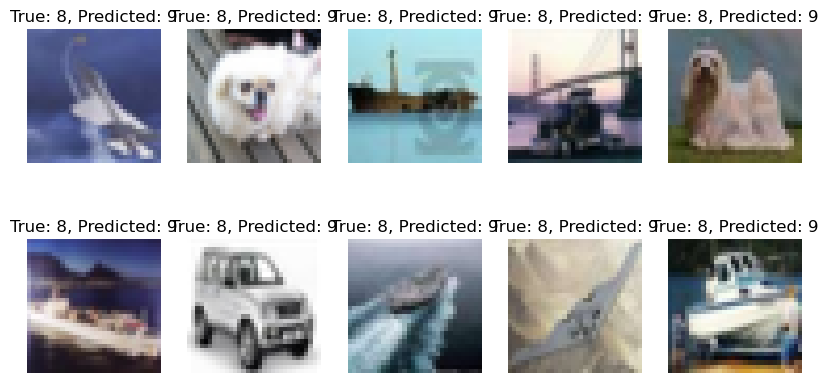

In [ ]:
# Оцінка точності на тестовому наборі
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_accuracy*100:.2f}%")

# Розпізнавання 10 випадкових зображень
random_indices = np.random.choice(x_test.shape[0], 10, replace=False)
random_images = x_test[random_indices]
predictions = model.predict(random_images)

# Виведення результатів розпізнавання
for i in range(10):
    predicted_class = np.argmax(predictions[i])
    true_class = np.argmax(y_test[random_indices[i]])
    print(f"Image {i + 1}: Predicted Class {predicted_class}, True Class {true_class}")

# Виведення зображень для перевірки
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(random_images[i], cmap='gray')
    plt.title(f"True: {true_class}, Predicted: {predicted_class}")
    plt.axis('off')
plt.show()

6. Статистика

Вивести статистику моделі

In [ ]:
# Виведення статистики моделі
print("\nModel Evaluation:")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# Статистика параметрів моделі
total_parameters = sum([np.prod(layer.get_weights()[i].shape) for layer in model.layers for i in range(len(layer.get_weights()))])

print(f"\nTotal Parameters: {total_parameters}")

# Статистика шарів моделі
for i, layer in enumerate(model.layers):
    print(f"\nLayer {i + 1}: {layer.name}")
    print(f"Number of Parameters: {layer.count_params()}")
    print(f"Input Shape: {layer.input_shape}, Output Shape: {layer.output_shape}")



Model Evaluation:
Test Loss: 1.4398
Test Accuracy: 49.76%

Total Parameters: 404010

Layer 1: flatten
Number of Parameters: 0
Input Shape: (None, 32, 32, 3), Output Shape: (None, 3072)

Layer 2: dense
Number of Parameters: 393344
Input Shape: (None, 3072), Output Shape: (None, 128)

Layer 3: dense_1
Number of Parameters: 8256
Input Shape: (None, 128), Output Shape: (None, 64)

Layer 4: dense_2
Number of Parameters: 2080
Input Shape: (None, 64), Output Shape: (None, 32)

Layer 5: dense_3
Number of Parameters: 330
Input Shape: (None, 32), Output Shape: (None, 10)


В ході виконання Практичної роботи №10 ми успішно створили та навчили нейронну мережу за допомогою Keras для класифікації зображень cifar_10. Модель складається з чотирьох повністю з'єднаних шарів, що дозволяє досягти високої точності без використання згорткових шарів та уникнути перенавчання під час тренування. Оцінка на тестовому наборі та розпізнавання випадкових зображень підтвердили ефективність нашої моделі.
